## Data Analytics Módulo 3

### Ejercicio de evaluación final



In [586]:

# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#cargamos los dos csv´s en dos dataframes diferentes
df_cf = pd.read_csv('Customer Flight Activity.csv')

In [588]:
df_cf.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [589]:
df_clh = pd.read_csv('Customer Loyalty History.csv')

In [590]:
df_clh.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN



## Fase 1: Exploración y Limpieza


1 Exploración Inicial:
- Realiza una exploración inicial de los datos para identificar posibles problemas, como valores nulos, atípicos o datos faltantes en las columnas relevantes.
- Utiliza funciones de Pandas para obtener información sobre la estructura de los datos, la presencia de valores nulos y estadísticas básicas de las columnas involucradas.
- Une los dos conjuntos de datos de la forma más eficiente.

In [591]:
#Primero hacemos la exploración inicial con un EDA. metemos todo en una función para explorar los datos. del primer dataframe.
def eda_basico(df_cf):
    print("🔍 PRIMER VISTAZO A LOS DATOS")
    print("📌 Primeras filas:")
    display(df_cf.head())

    print("📌 Últimas filas:")
    display(df_cf.tail())

    print("📌 Muestra aleatoria:")
    display(df_cf.sample(5))

    print("🧱 ESTRUCTURA DEL DATAFRAME")
    print(f"📐 Dimensiones (filas, columnas): {df_cf.shape}\n")

    print("📋 Columnas:")
    display(df_cf.columns)

    print("🧠 Información general:")
    display(df_cf.info())

    print("📊 Tipos de datos por columna:")
    display(df_cf.dtypes)

    print("📉 ESTADÍSTICAS DESCRIPTIVAS")
    print("📈 Variables numéricas:")
    display(df_cf.describe().T)

    print("🔤 Variables categóricas:")
    cat_cols = df_cf.select_dtypes(include='object').columns
    if len(cat_cols) > 0:
        display(df_cf.describe(include='O').T)
    else:
        print("⚠️ No hay columnas categóricas en este DataFrame.")
    
    print("🔢 CARDINALIDAD")
    print(f"🔹 Total de valores únicos en el DataFrame: {df_cf.nunique().sum()}\n")

    print("🔹Nº de valores únicos por columna:")
    display(df_cf.nunique())

    print("🔍 Valores únicos por columna. nombres valores columnas (todo):")
    for col in df_cf.columns:
        print(f"📌 {col}: {df_cf[col].unique()}")

    print("\n🚫 VALORES NULOS")
    display(df_cf.isnull().sum())
    
    print("🚫 Porcentaje de valores nulos (%)")
    display(((df_cf.isnull().sum() / df_cf.shape[0]) * 100).round(2))

    print("📎 DUPLICADOS")
    dup_count = df_cf.duplicated().sum()
    print(f"Duplicados: {dup_count}")
    if dup_count > 0:
        print("Los duplicados son:")
        display(df_cf[df_cf.duplicated()])
    else:
        print("✅ No hay filas duplicadas.")
    print("\n📊 VALUE COUNTS (solo categóricas)")
    cat_cols = df_cf.select_dtypes(include='O').columns
    for col in cat_cols:
        print(f"\n📌 {col}")
        display(df_cf[col].value_counts())

In [592]:
eda_basico(df_cf)

🔍 PRIMER VISTAZO A LOS DATOS
📌 Primeras filas:


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


📌 Últimas filas:


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
405619,999902,2018,12,0,0,0,0,0.0,0,0
405620,999911,2018,12,0,0,0,0,0.0,0,0
405621,999940,2018,12,3,0,3,1233,123.0,0,0
405622,999982,2018,12,0,0,0,0,0.0,0,0
405623,999986,2018,12,0,0,0,0,0.0,0,0


📌 Muestra aleatoria:


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
385674,835764,2018,11,2,0,2,784,78.0,0,0
218299,924634,2018,1,8,0,8,1344,134.0,0,0
33088,185013,2018,12,16,4,20,4080,408.0,410,33
242034,590246,2018,4,7,1,8,1624,202.5,0,0
243168,450323,2018,3,0,0,0,0,0.0,0,0


🧱 ESTRUCTURA DEL DATAFRAME
📐 Dimensiones (filas, columnas): (405624, 10)

📋 Columnas:


Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')

🧠 Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


None

📊 Tipos de datos por columna:


Loyalty Number                   int64
Year                             int64
Month                            int64
Flights Booked                   int64
Flights with Companions          int64
Total Flights                    int64
Distance                         int64
Points Accumulated             float64
Points Redeemed                  int64
Dollar Cost Points Redeemed      int64
dtype: object

📉 ESTADÍSTICAS DESCRIPTIVAS
📈 Variables numéricas:


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0


🔤 Variables categóricas:
⚠️ No hay columnas categóricas en este DataFrame.
🔢 CARDINALIDAD
🔹 Total de valores únicos en el DataFrame: 23749

🔹Nº de valores únicos por columna:


Loyalty Number                 16737
Year                               2
Month                             12
Flights Booked                    22
Flights with Companions           12
Total Flights                     33
Distance                        4746
Points Accumulated              1549
Points Redeemed                  587
Dollar Cost Points Redeemed       49
dtype: int64

🔍 Valores únicos por columna. nombres valores columnas (todo):
📌 Loyalty Number: [100018 100102 100140 ... 999731 999788 999891]
📌 Year: [2017 2018]
📌 Month: [ 1  9  2  3 11  4  5  7  6  8 10 12]
📌 Flights Booked: [ 3 10  6  0  8 11  9  4  7  5  2  1 12 13 14 16 15 17 18 19 20 21]
📌 Flights with Companions: [ 0  4  7  1  6  3  5  2 10  8  9 11]
📌 Total Flights: [ 3 14  6  0 15 11 12 10  8  9  7  5 16  2  1 17 13 22  4 19 18 21 26 20
 23 25 27 24 28 30 29 31 32]
📌 Distance: [1521 2030 1200 ... 1217  617 4135]
📌 Points Accumulated: [152.   203.   120.   ...  18.75 601.   626.  ]
📌 Points Redeemed: [  0 341 364 310 445 312 343 366 389 292 447 324 456 409 436 327 322 291
 323 300 290 309 325 386 321 363 340 670 443 517 444 328 344 367 313 333
 293 449 297 455 372 356 405 381 466 419 369 352 482 335 329 305 415 396
 317 348 314 334 350 330 318 298 420 336 471 680 441 353 484 301 374 417
 501 299 398 307 368 306 347 439 395 481 337 382 426 373 399 424 326 392
 438 467 480 448 308 400 376 375

Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

🚫 Porcentaje de valores nulos (%)


Loyalty Number                 0.0
Year                           0.0
Month                          0.0
Flights Booked                 0.0
Flights with Companions        0.0
Total Flights                  0.0
Distance                       0.0
Points Accumulated             0.0
Points Redeemed                0.0
Dollar Cost Points Redeemed    0.0
dtype: float64

📎 DUPLICADOS
Duplicados: 1864
Los duplicados son:


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
42,101902,2017,1,0,0,0,0,0.0,0,0
227,112142,2017,1,0,0,0,0,0.0,0,0
478,126100,2017,1,0,0,0,0,0.0,0,0
567,130331,2017,1,0,0,0,0,0.0,0,0
660,135421,2017,1,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
404668,949628,2018,12,0,0,0,0,0.0,0,0
404884,960050,2018,12,0,0,0,0,0.0,0,0
405111,971370,2018,12,0,0,0,0,0.0,0,0
405410,988392,2018,12,0,0,0,0,0.0,0,0



📊 VALUE COUNTS (solo categóricas)


In [593]:
#Ahora hacemos lo mismo con el segundo dataframe
def eda_basico(df_clh):
    print("🔍 PRIMER VISTAZO A LOS DATOS")
    print("📌 Primeras filas:")
    display(df_clh.head())

    print("📌 Últimas filas:")
    display(df_clh.tail())

    print("📌 Muestra aleatoria:")
    display(df_clh.sample(5))

    print("🧱 ESTRUCTURA DEL DATAFRAME")
    print(f"📐 Dimensiones (filas, columnas): {df_clh.shape}\n")

    print("📋 Columnas:")
    display(df_clh.columns)

    print("🧠 Información general:")
    display(df_clh.info())

    print("📊 Tipos de datos por columna:")
    display(df_clh.dtypes)

    print("📉 ESTADÍSTICAS DESCRIPTIVAS")
    print("📈 Variables numéricas:")
    display(df_clh.describe().T)

    print("🔤 Variables categóricas:")
    cat_cols = df_clh.select_dtypes(include='object').columns
    if len(cat_cols) > 0:
        display(df_clh.describe(include='O').T)
    else:
        print("⚠️ No hay columnas categóricas en este DataFrame.")
    
    print("🔢 CARDINALIDAD")
    print(f"🔹 Total de valores únicos en el DataFrame: {df_clh.nunique().sum()}\n")

    print("🔹Nº de valores únicos por columna:")
    display(df_clh.nunique())

    print("🔍 Valores únicos por columna. nombres valores columnas (todo):")
    for col in df_clh.columns:
        print(f"📌 {col}: {df_clh[col].unique()}")

    print("\n🚫 VALORES NULOS")
    display(df_clh.isnull().sum())
    
    print("🚫 Porcentaje de valores nulos (%)")
    display(((df_clh.isnull().sum() / df_clh.shape[0]) * 100).round(2))

    print("📎 DUPLICADOS")
    dup_count = df_clh.duplicated().sum()
    print(f"Duplicados: {dup_count}")
    if dup_count > 0:
        print("Los duplicados son:")
        display(df_clh[df_clh.duplicated()])
    else:
        print("✅ No hay filas duplicadas.")
    print("\n📊 VALUE COUNTS (solo categóricas)")
    cat_cols = df_clh.select_dtypes(include='O').columns
    for col in cat_cols:
        print(f"\n📌 {col}")
        display(df_clh[col].value_counts())

In [594]:
eda_basico(df_clh)

🔍 PRIMER VISTAZO A LOS DATOS
📌 Primeras filas:


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


📌 Últimas filas:


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
16732,823768,Canada,British Columbia,Vancouver,V6E 3Z3,Female,College,NaN,Married,Star,61850.19,Standard,2012,12,NaN,NaN
16733,680886,Canada,Saskatchewan,Regina,S1J 3C5,Female,Bachelor,89210.0,Married,Star,67907.27,Standard,2014,9,NaN,NaN
16734,776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,74228.52,Standard,2014,3,NaN,NaN
16735,906428,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,-57297.0,Married,Star,10018.66,2018 Promotion,2018,4,NaN,NaN
16736,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0


📌 Muestra aleatoria:


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
8048,164034,Canada,Quebec,Montreal,H2T 2J6,Male,Doctor,221857.0,Married,Nova,8257.67,Standard,2015,3,NaN,NaN
14863,366744,Canada,British Columbia,Victoria,V10 6T5,Male,Bachelor,50375.0,Divorced,Star,7995.41,Standard,2012,9,NaN,NaN
9532,801788,Canada,New Brunswick,Fredericton,E3B 2H2,Male,Bachelor,83666.0,Married,Nova,21312.38,Standard,2014,9,NaN,NaN
5835,958767,Canada,Ontario,Toronto,P2T 6G3,Female,Bachelor,96749.0,Divorced,Nova,4439.90,Standard,2013,2,NaN,NaN
6014,712362,Canada,Quebec,Montreal,H2T 2J6,Male,Bachelor,74413.0,Married,Nova,4686.47,Standard,2016,6,NaN,NaN


🧱 ESTRUCTURA DEL DATAFRAME
📐 Dimensiones (filas, columnas): (16737, 16)

📋 Columnas:


Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month'],
      dtype='object')

🧠 Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-n

None

📊 Tipos de datos por columna:


Loyalty Number          int64
Country                object
Province               object
City                   object
Postal Code            object
Gender                 object
Education              object
Salary                float64
Marital Status         object
Loyalty Card           object
CLV                   float64
Enrollment Type        object
Enrollment Year         int64
Enrollment Month        int64
Cancellation Year     float64
Cancellation Month    float64
dtype: object

📉 ESTADÍSTICAS DESCRIPTIVAS
📈 Variables numéricas:


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


🔤 Variables categóricas:


,count,unique,top,freq
Country,16737,1,Canada,16737
Province,16737,11,Ontario,5404
City,16737,29,Toronto,3351
Postal Code,16737,55,V6E 3D9,911
Gender,16737,2,Female,8410
Education,16737,5,Bachelor,10475
Marital Status,16737,3,Married,9735
Loyalty Card,16737,3,Star,7637
Enrollment Type,16737,2,Standard,15766


🔢 CARDINALIDAD
🔹 Total de valores únicos en el DataFrame: 30759

🔹Nº de valores únicos por columna:


Loyalty Number        16737
Country                   1
Province                 11
City                     29
Postal Code              55
Gender                    2
Education                 5
Salary                 5890
Marital Status            3
Loyalty Card              3
CLV                    7984
Enrollment Type           2
Enrollment Year           7
Enrollment Month         12
Cancellation Year         6
Cancellation Month       12
dtype: int64

🔍 Valores únicos por columna. nombres valores columnas (todo):
📌 Loyalty Number: [480934 549612 429460 ... 776187 906428 652627]
📌 Country: ['Canada']
📌 Province: ['Ontario' 'Alberta' 'British Columbia' 'Quebec' 'Yukon' 'New Brunswick'
 'Manitoba' 'Nova Scotia' 'Saskatchewan' 'Newfoundland'
 'Prince Edward Island']
📌 City: ['Toronto' 'Edmonton' 'Vancouver' 'Hull' 'Whitehorse' 'Trenton' 'Montreal'
 'Dawson Creek' 'Quebec City' 'Fredericton' 'Ottawa' 'Tremblant' 'Calgary'
 'Thunder Bay' 'Whistler' 'Peace River' 'Winnipeg' 'Sudbury'
 'West Vancouver' 'Halifax' 'London' 'Regina' 'Kelowna' "St. John's"
 'Victoria' 'Kingston' 'Banff' 'Moncton' 'Charlottetown']
📌 Postal Code: ['M2Z 4K1' 'T3G 6Y6' 'V6E 3D9' 'P1W 1K4' 'J8Y 3Z5' 'Y2K 6R0' 'P5S 6R4'
 'K8V 4B2' 'H2Y 2W2' 'M8Y 4K8' 'U5I 4F1' 'G1B 3L5' 'H4G 3T4' 'M2M 7K8'
 'M2M 6J7' 'E3B 2H2' 'M1R 4K3' 'T9G 1W3' 'H2Y 4R4' 'V5R 1W3' 'P1L 8X8'
 'K1F 2R2' 'H5Y 2S9' 'V1E 4R6' 'H2T 2J6' 'T3E 2V9' 'H2T 9K8' 'K8T 5M5'
 'V6T 1Y8' 'P2T 6G3' 'T9O 2W2' 'V6E 3Z

Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

🚫 Porcentaje de valores nulos (%)


Loyalty Number         0.00
Country                0.00
Province               0.00
City                   0.00
Postal Code            0.00
Gender                 0.00
Education              0.00
Salary                25.32
Marital Status         0.00
Loyalty Card           0.00
CLV                    0.00
Enrollment Type        0.00
Enrollment Year        0.00
Enrollment Month       0.00
Cancellation Year     87.65
Cancellation Month    87.65
dtype: float64

📎 DUPLICADOS
Duplicados: 0
✅ No hay filas duplicadas.

📊 VALUE COUNTS (solo categóricas)

📌 Country


Country
Canada    16737
Name: count, dtype: int64


📌 Province


Province
Ontario                 5404
British Columbia        4409
Quebec                  3300
Alberta                  969
Manitoba                 658
New Brunswick            636
Nova Scotia              518
Saskatchewan             409
Newfoundland             258
Yukon                    110
Prince Edward Island      66
Name: count, dtype: int64


📌 City


City
Toronto           3351
Vancouver         2582
Montreal          2059
Winnipeg           658
Whistler           582
Halifax            518
Ottawa             509
Trenton            486
Edmonton           486
Quebec City        485
Dawson Creek       444
Fredericton        425
Regina             409
Kingston           401
Tremblant          398
Victoria           389
Hull               358
West Vancouver     324
St. John's         258
Thunder Bay        256
Sudbury            227
Moncton            211
Calgary            191
Banff              179
London             174
Peace River        113
Whitehorse         110
Kelowna             88
Charlottetown       66
Name: count, dtype: int64


📌 Postal Code


Postal Code
V6E 3D9    911
V5R 1W3    684
V6T 1Y8    582
V6E 3Z3    544
M2M 7K8    534
P1J 8T7    500
H2T 9K8    499
K8V 4B2    486
G1B 3L5    485
H2T 2J6    446
U5I 4F1    444
V1E 4R6    443
E3B 2H2    425
R2C 0M5    415
M9K 2P4    401
H5Y 2S9    398
K1F 2R2    389
V10 6T5    389
H2Y 2W2    365
J8Y 3Z5    358
M8Y 4K8    340
H4G 3T4    338
B3J 9S2    329
V6V 8Z3    324
P2T 6G3    322
H2Y 4R4    315
M1R 4K3    313
P1L 8X8    282
P1W 1K4    275
T9G 1W3    266
A1C 6H9    258
M2Z 4K1    257
K8T 5M5    256
P5S 6R4    246
M5V 1G5    227
S6J 3G0    226
T3G 6Y6    220
E1A 2A7    211
T3E 2V9    191
B3C 2M8    189
S1J 3C5    183
T4V 1D4    179
M5B 3E4    174
M2M 6J7    153
R6Y 4T5    143
M2P 4F6    126
K1G 4Z0    120
T9O 2W2    113
Y2K 6R0    110
R3R 3T4    100
H3T 8L4     89
V09 2E9     88
C1A 6E8     66
H3J 5I6      7
M3R 4K8      3
Name: count, dtype: int64


📌 Gender


Gender
Female    8410
Male      8327
Name: count, dtype: int64


📌 Education


Education
Bachelor                10475
College                  4238
High School or Below      782
Doctor                    734
Master                    508
Name: count, dtype: int64


📌 Marital Status


Marital Status
Married     9735
Single      4484
Divorced    2518
Name: count, dtype: int64


📌 Loyalty Card


Loyalty Card
Star      7637
Nova      5671
Aurora    3429
Name: count, dtype: int64


📌 Enrollment Type


Enrollment Type
Standard          15766
2018 Promotion      971
Name: count, dtype: int64

In [595]:
df_cf.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')

In [596]:
df_clh.columns

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month'],
      dtype='object')

In [597]:
# Limpieza básica: nombres de columnas vamos a normalizar los datos antes de unirlas por si acaso y ya pasamos a unión de los dos dataframes, por si hubeise espacios en blanco. 
df_cf.columns = df_cf.columns.str.strip()
df_clh.columns = df_clh.columns.str.strip()

In [598]:
#comprobación rápida para saber que hay el mismo nº de filas en ambos dataframes y tiene el mismo número de clietes.
print("Clientes en vuelos:", df_cf["Loyalty Number"].nunique())
print("Clientes en loyalty:", df_clh["Loyalty Number"].nunique())


Clientes en vuelos: 16737
Clientes en loyalty: 16737


In [599]:
#Una vez realizada la exploración inicial de nuestros dataframes, realizamos la unión de ambos. Lo haremos por Loyalty Number que es la que tiene en común.utilizando un merge con outer ya que quiero de momento todos los datos de ambos dataframes con todos los clientes aunque no estén en ambos dataframes.
df_conjunto = pd.merge(df_cf, df_clh, on="Loyalty Number", how="outer")
print("Dataset unido con OUTER:", df_conjunto.shape)
df_conjunto = df_conjunto.reset_index(drop=True) #lo guardamos el dataframe nuevo.
df_conjunto.head() #hacemos un head para ver como ha quedado unido. 



Dataset unido con OUTER: (405624, 25)


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
1,100018,2017,2,2,2,4,1320,132.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
2,100018,2018,10,6,4,10,3110,311.0,385,31,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
3,100018,2017,4,4,0,4,924,92.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
4,100018,2017,5,0,0,0,0,0.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN


In [600]:
#AUna vez unido los dataframes, hago otro eda par como haquedado unido.
def eda_basico(df_conjunto):
    print("🔍 PRIMER VISTAZO A LOS DATOS")
    print("📌 Primeras filas:")
    display(df_conjunto.head())

    print("📌 Últimas filas:")
    display(df_conjunto.tail())

    print("📌 Muestra aleatoria:")
    display(df_conjunto.sample(5))

    print("🧱 ESTRUCTURA DEL DATAFRAME")
    print(f"📐 Dimensiones (filas, columnas): {df_conjunto.shape}\n")

    print("📋 Columnas:")
    display(df_conjunto.columns)

    print("🧠 Información general:")
    display(df_conjunto.info())

    print("📊 Tipos de datos por columna:")
    display(df_conjunto.dtypes)

    print("📉 ESTADÍSTICAS DESCRIPTIVAS")
    print("📈 Variables numéricas:")
    display(df_conjunto.describe().T)

    print("🔤 Variables categóricas:")
    cat_cols = df_conjunto.select_dtypes(include='object').columns
    if len(cat_cols) > 0:
        display(df_conjunto.describe(include='O').T)
    else:
        print("⚠️ No hay columnas categóricas en este DataFrame.")
    
    print("🔢 CARDINALIDAD")
    print(f"🔹 Total de valores únicos en el DataFrame: {df_conjunto.nunique().sum()}\n")

    print("🔹Nº de valores únicos por columna:")
    display(df_conjunto.nunique())

    print("🔍 Valores únicos por columna. nombres valores columnas (todo):")
    for col in df_conjunto.columns:
        print(f"📌 {col}: {df_conjunto[col].unique()}")

    print("\n🚫 VALORES NULOS")
    display(df_conjunto.isnull().sum())
    
    print("🚫 Porcentaje de valores nulos (%)")
    display(((df_conjunto.isnull().sum() / df_conjunto.shape[0]) * 100).round(2))

    print("📎 DUPLICADOS")
    dup_count = df_conjunto.duplicated().sum()
    print(f"Duplicados: {dup_count}")
    if dup_count > 0:
        print("Los duplicados son:")
        display(df_conjunto[df_conjunto.duplicated()])
    else:
        print("✅ No hay filas duplicadas.")
    print("\n📊 VALUE COUNTS (solo categóricas)")
    cat_cols = df_conjunto.select_dtypes(include='O').columns
    for col in cat_cols:
        print(f"\n📌 {col}")
        display(df_conjunto[col].value_counts())

In [601]:
eda_basico(df_conjunto)

🔍 PRIMER VISTAZO A LOS DATOS
📌 Primeras filas:


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
1,100018,2017,2,2,2,4,1320,132.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
2,100018,2018,10,6,4,10,3110,311.0,385,31,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
3,100018,2017,4,4,0,4,924,92.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
4,100018,2017,5,0,0,0,0,0.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN


📌 Últimas filas:


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
405619,999986,2018,7,15,0,15,1995,199.0,0,0,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,NaN,NaN
405620,999986,2018,9,0,0,0,0,0.0,0,0,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,NaN,NaN
405621,999986,2018,10,6,0,6,708,70.0,0,0,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,NaN,NaN
405622,999986,2018,11,11,4,15,2040,204.0,0,0,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,NaN,NaN
405623,999986,2018,12,0,0,0,0,0.0,0,0,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,NaN,NaN


📌 Muestra aleatoria:


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
275142,709550,2017,7,2,2,4,2664,266.0,0,0,Canada,Quebec,Montreal,H2T 2J6,Female,Bachelor,103558.0,Single,Star,4928.00,Standard,2012,7,NaN,NaN
320313,808341,2017,10,0,0,0,0,0.0,0,0,Canada,New Brunswick,Fredericton,E3B 2H2,Male,Bachelor,101352.0,Married,Star,3808.12,Standard,2018,11,NaN,NaN
113655,352582,2018,2,5,2,7,1806,270.0,0,0,Canada,Ontario,Toronto,P1J 8T7,Male,Bachelor,49100.0,Married,Aurora,5469.54,2018 Promotion,2018,4,NaN,NaN
120325,368878,2018,2,0,0,0,0,0.0,0,0,Canada,Quebec,Montreal,H4G 3T4,Male,Bachelor,82534.0,Single,Star,5439.36,Standard,2018,7,NaN,NaN
80216,278568,2017,9,0,0,0,0,0.0,0,0,Canada,Saskatchewan,Regina,S6J 3G0,Female,Bachelor,70846.0,Married,Star,7228.99,Standard,2018,8,NaN,NaN


🧱 ESTRUCTURA DEL DATAFRAME
📐 Dimensiones (filas, columnas): (405624, 25)

📋 Columnas:


Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed',
       'Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education',
       'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type',
       'Enrollment Year', 'Enrollment Month', 'Cancellation Year',
       'Cancellation Month'],
      dtype='object')

🧠 Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
 10  Country                      405624 non-null  object 
 11  Province                     405624 non-null  object 
 12  City                         405624

None

📊 Tipos de datos por columna:


Loyalty Number                   int64
Year                             int64
Month                            int64
Flights Booked                   int64
Flights with Companions          int64
Total Flights                    int64
Distance                         int64
Points Accumulated             float64
Points Redeemed                  int64
Dollar Cost Points Redeemed      int64
Country                         object
Province                        object
City                            object
Postal Code                     object
Gender                          object
Education                       object
Salary                         float64
Marital Status                  object
Loyalty Card                    object
CLV                            float64
Enrollment Type                 object
Enrollment Year                  int64
Enrollment Month                 int64
Cancellation Year              float64
Cancellation Month             float64
dtype: object

📉 ESTADÍSTICAS DESCRIPTIVAS
📈 Variables numéricas:


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.00,326961.00,550834.00,772194.00,999986.00
Year,405624.0,2017.500000,0.500001,2017.00,2017.00,2017.50,2018.00,2018.00
Month,405624.0,6.500000,3.452057,1.00,3.75,6.50,9.25,12.00
Flights Booked,405624.0,4.115052,5.225518,0.00,0.00,1.00,8.00,21.00
Flights with Companions,405624.0,1.031805,2.076869,0.00,0.00,0.00,1.00,11.00
Total Flights,405624.0,5.146858,6.521227,0.00,0.00,1.00,10.00,32.00
Distance,405624.0,1208.880059,1433.155320,0.00,0.00,488.00,2336.00,6293.00
Points Accumulated,405624.0,123.692721,146.599831,0.00,0.00,50.00,239.00,676.50
Points Redeemed,405624.0,30.696872,125.486049,0.00,0.00,0.00,0.00,876.00
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.00,0.00,0.00,0.00,71.00


🔤 Variables categóricas:


,count,unique,top,freq
Country,405624,1,Canada,405624
Province,405624,11,Ontario,130896
City,405624,29,Toronto,81096
Postal Code,405624,55,V6E 3D9,21984
Gender,405624,2,Female,203640
Education,405624,5,Bachelor,253752
Marital Status,405624,3,Married,235800
Loyalty Card,405624,3,Star,184224
Enrollment Type,405624,2,Standard,382200


🔢 CARDINALIDAD
🔹 Total de valores únicos en el DataFrame: 37771

🔹Nº de valores únicos por columna:


Loyalty Number                 16737
Year                               2
Month                             12
Flights Booked                    22
Flights with Companions           12
Total Flights                     33
Distance                        4746
Points Accumulated              1549
Points Redeemed                  587
Dollar Cost Points Redeemed       49
Country                            1
Province                          11
City                              29
Postal Code                       55
Gender                             2
Education                          5
Salary                          5890
Marital Status                     3
Loyalty Card                       3
CLV                             7984
Enrollment Type                    2
Enrollment Year                    7
Enrollment Month                  12
Cancellation Year                  6
Cancellation Month                12
dtype: int64

🔍 Valores únicos por columna. nombres valores columnas (todo):
📌 Loyalty Number: [100018 100102 100140 ... 999940 999982 999986]
📌 Year: [2017 2018]
📌 Month: [ 1  2 10  4  5  6  7  9  8 11 12  3]
📌 Flights Booked: [ 3  2  6  4  0 10  9 13  1 14  7  5 11 17  8 15 12 16 20 18 19 21]
📌 Flights with Companions: [ 0  2  4  1  5  3  7  6  8  9 10 11]
📌 Total Flights: [ 3  4 10  0  5 13 15  6 14  1 17  7 16 11 23  9  8 18 19 12 21  2 20 22
 28 26 29 27 25 24 30 31 32]
📌 Distance: [1521 1320 3110 ... 4162 1979 5676]
📌 Points Accumulated: [152.   132.   311.   ... 482.76 626.   658.5 ]
📌 Points Redeemed: [  0 385 690 438 510 685 593 459 402 393 614 464 546 371 559 561 581 335
 828 495 431 683 461 832 499 605 512 502 644 712 556 365 324 353 468 425
 555 493 549 760 410 340 579 501 770 341 505 681 389 325 484 342 552 382
 700 515 720 737 698 608 444 487 471 746 576 548 373 567 379 454 507 456
 670 517 448 366 488 541 678 376 511 509 761 506 397 523 676 440 449 407
 419 528 564 308 594 344 539 489

Loyalty Number                      0
Year                                0
Month                               0
Flights Booked                      0
Flights with Companions             0
Total Flights                       0
Distance                            0
Points Accumulated                  0
Points Redeemed                     0
Dollar Cost Points Redeemed         0
Country                             0
Province                            0
City                                0
Postal Code                         0
Gender                              0
Education                           0
Salary                         102672
Marital Status                      0
Loyalty Card                        0
CLV                                 0
Enrollment Type                     0
Enrollment Year                     0
Enrollment Month                    0
Cancellation Year              355560
Cancellation Month             355560
dtype: int64

🚫 Porcentaje de valores nulos (%)


Loyalty Number                  0.00
Year                            0.00
Month                           0.00
Flights Booked                  0.00
Flights with Companions         0.00
Total Flights                   0.00
Distance                        0.00
Points Accumulated              0.00
Points Redeemed                 0.00
Dollar Cost Points Redeemed     0.00
Country                         0.00
Province                        0.00
City                            0.00
Postal Code                     0.00
Gender                          0.00
Education                       0.00
Salary                         25.31
Marital Status                  0.00
Loyalty Card                    0.00
CLV                             0.00
Enrollment Type                 0.00
Enrollment Year                 0.00
Enrollment Month                0.00
Cancellation Year              87.66
Cancellation Month             87.66
dtype: float64

📎 DUPLICADOS
Duplicados: 1864
Los duplicados son:


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
985,101902,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,London,M5B 3E4,Female,College,NaN,Married,Aurora,6265.34,Standard,2017,1,NaN,NaN
988,101902,2017,2,0,0,0,0,0.0,0,0,Canada,Ontario,London,M5B 3E4,Female,College,NaN,Married,Aurora,6265.34,Standard,2017,1,NaN,NaN
990,101902,2017,3,0,0,0,0,0.0,0,0,Canada,Ontario,London,M5B 3E4,Female,College,NaN,Married,Aurora,6265.34,Standard,2017,1,NaN,NaN
998,101902,2017,7,0,0,0,0,0.0,0,0,Canada,Ontario,London,M5B 3E4,Female,College,NaN,Married,Aurora,6265.34,Standard,2017,1,NaN,NaN
1009,101902,2017,12,0,0,0,0,0.0,0,0,Canada,Ontario,London,M5B 3E4,Female,College,NaN,Married,Aurora,6265.34,Standard,2017,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402315,992168,2017,2,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1J 8T7,Male,High School or Below,66386.0,Married,Nova,5746.33,Standard,2012,9,NaN,NaN
402324,992168,2017,6,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1J 8T7,Male,High School or Below,66386.0,Married,Nova,5746.33,Standard,2012,9,NaN,NaN
402331,992168,2017,9,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1J 8T7,Male,High School or Below,66386.0,Married,Nova,5746.33,Standard,2012,9,NaN,NaN
402347,992168,2018,6,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1J 8T7,Male,High School or Below,66386.0,Married,Nova,5746.33,Standard,2012,9,NaN,NaN



📊 VALUE COUNTS (solo categóricas)

📌 Country


Country
Canada    405624
Name: count, dtype: int64


📌 Province


Province
Ontario                 130896
British Columbia        106848
Quebec                   79968
Alberta                  23400
Manitoba                 15984
New Brunswick            15432
Nova Scotia              12576
Saskatchewan              9936
Newfoundland              6312
Yukon                     2688
Prince Edward Island      1584
Name: count, dtype: int64


📌 City


City
Toronto           81096
Vancouver         62520
Montreal          49920
Winnipeg          15984
Whistler          14040
Halifax           12576
Ottawa            12312
Edmonton          11808
Quebec City       11760
Trenton           11760
Dawson Creek      10776
Fredericton       10344
Regina             9936
Kingston           9720
Tremblant          9600
Victoria           9504
Hull               8688
West Vancouver     7872
St. John's         6312
Thunder Bay        6264
Sudbury            5520
Moncton            5088
Calgary            4584
Banff              4296
London             4224
Peace River        2712
Whitehorse         2688
Kelowna            2136
Charlottetown      1584
Name: count, dtype: int64


📌 Postal Code


Postal Code
V6E 3D9    21984
V5R 1W3    16608
V6T 1Y8    14040
V6E 3Z3    13200
M2M 7K8    12936
P1J 8T7    12168
H2T 9K8    12024
G1B 3L5    11760
K8V 4B2    11760
H2T 2J6    10800
U5I 4F1    10776
V1E 4R6    10728
E3B 2H2    10344
R2C 0M5    10104
M9K 2P4     9720
H5Y 2S9     9600
V10 6T5     9504
K1F 2R2     9408
H2Y 2W2     8880
J8Y 3Z5     8688
M8Y 4K8     8256
H4G 3T4     8208
B3J 9S2     8016
V6V 8Z3     7872
P2T 6G3     7800
H2Y 4R4     7656
M1R 4K3     7536
P1L 8X8     6792
P1W 1K4     6624
T9G 1W3     6456
A1C 6H9     6312
K8T 5M5     6264
M2Z 4K1     6192
P5S 6R4     5976
M5V 1G5     5520
S6J 3G0     5472
T3G 6Y6     5352
E1A 2A7     5088
T3E 2V9     4584
B3C 2M8     4560
S1J 3C5     4464
T4V 1D4     4296
M5B 3E4     4224
M2M 6J7     3696
R6Y 4T5     3480
M2P 4F6     3048
K1G 4Z0     2904
T9O 2W2     2712
Y2K 6R0     2688
R3R 3T4     2400
H3T 8L4     2184
V09 2E9     2136
C1A 6E8     1584
H3J 5I6      168
M3R 4K8       72
Name: count, dtype: int64


📌 Gender


Gender
Female    203640
Male      201984
Name: count, dtype: int64


📌 Education


Education
Bachelor                253752
College                 102672
High School or Below     19008
Doctor                   17856
Master                   12336
Name: count, dtype: int64


📌 Marital Status


Marital Status
Married     235800
Single      108648
Divorced     61176
Name: count, dtype: int64


📌 Loyalty Card


Loyalty Card
Star      184224
Nova      137568
Aurora     83832
Name: count, dtype: int64


📌 Enrollment Type


Enrollment Type
Standard          382200
2018 Promotion     23424
Name: count, dtype: int64

2 Limpieza de Datos:
- Elimina o trata los valores nulos, si los hay, en las columnas clave para asegurar que los datos estén completos.
- Verifica la consistencia y corrección de los datos para asegurarte de que los datos se presenten de forma coherente.
- Realiza cualquier ajuste o conversión necesaria en las columnas (por ejemplo, cambiar tipos de datos) para garantizar la adecuación de los datos para el análisis estadístico.


ELIMINACIÓN DE DUPLICADOS

In [602]:
#lo primewro que vamos a gestionar son los duplciados. Los eliminamos porque no aportan nada a nuestro análisis.
df_conjunto = df_conjunto.drop_duplicates()


In [603]:
#comprobamos que se han eliminado los duplicados
print("📎 DUPLICADOS")
dup_count = df_conjunto.duplicated().sum()
print(f"Duplicados: {dup_count}")
if dup_count > 0:
        print("Los duplicados son:")
        display(df_conjunto[df_conjunto.duplicated()])
else:
        print("✅ No hay filas duplicadas.")

📎 DUPLICADOS
Duplicados: 0
✅ No hay filas duplicadas.


In [604]:
#Comprubeo que no haya valores negativos en las variables numéricas que no deberían tenerlos.
(df_conjunto[["Flights Booked", "Distance", "Points Accumulated"]] < 0).sum()

Flights Booked        0
Distance              0
Points Accumulated    0
dtype: int64

In [605]:
#Comprubeo los meses
df_conjunto["Month"].unique()

array([ 1,  2, 10,  4,  5,  6,  7,  9,  8, 11, 12,  3])

In [606]:
#revisamos género
df_conjunto["Gender"].value_counts()

Gender
Female    202757
Male      201003
Name: count, dtype: int64

In [607]:
#revisamos education
df_conjunto["Education"].value_counts()

Education
Bachelor                252567
College                 102260
High School or Below     18915
Doctor                   17731
Master                   12287
Name: count, dtype: int64

In [608]:
#revisamos pc
df_conjunto["Postal Code"].unique()

array(['T9G 1W3', 'M1R 4K3', 'U5I 4F1', 'V5R 1W3', 'P1L 8X8', 'P1J 8T7',
       'S6J 3G0', 'H2T 9K8', 'V6E 3D9', 'M5V 1G5', 'H2Y 4R4', 'R2C 0M5',
       'V6E 3Z3', 'G1B 3L5', 'T9O 2W2', 'A1C 6H9', 'H5Y 2S9', 'K1F 2R2',
       'K8V 4B2', 'R3R 3T4', 'P1W 1K4', 'K8T 5M5', 'V6V 8Z3', 'M2M 7K8',
       'E3B 2H2', 'H2Y 2W2', 'M5B 3E4', 'P5S 6R4', 'P2T 6G3', 'B3J 9S2',
       'B3C 2M8', 'H4G 3T4', 'R6Y 4T5', 'H2T 2J6', 'M2Z 4K1', 'S1J 3C5',
       'E1A 2A7', 'V1E 4R6', 'T4V 1D4', 'M9K 2P4', 'M8Y 4K8', 'T3G 6Y6',
       'M2M 6J7', 'V6T 1Y8', 'C1A 6E8', 'J8Y 3Z5', 'V10 6T5', 'H3T 8L4',
       'T3E 2V9', 'V09 2E9', 'Y2K 6R0', 'K1G 4Z0', 'M2P 4F6', 'M3R 4K8',
       'H3J 5I6'], dtype=object)

In [609]:
#creo una columna de Enrollment date que mezcla el año y el mes de enrollement para tener una fecha completa. 
# Para esto utilizo la función to_datetime de pandas que me permite crear una fecha a partir de un diccionario con el año, el mes y el día. En este caso, como no tenemos el día, le asignamos el día 1 a todas las filas.
df_conjunto["Enrollment Date"] = pd.to_datetime(
    dict(year=df_conjunto["Enrollment Year"],
         month=df_conjunto["Enrollment Month"],
         day=1)
)

In [610]:
df_conjunto.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Enrollment Date
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN,2016-08-01
1,100018,2017,2,2,2,4,1320,132.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN,2016-08-01
2,100018,2018,10,6,4,10,3110,311.0,385,31,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN,2016-08-01
3,100018,2017,4,4,0,4,924,92.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN,2016-08-01
4,100018,2017,5,0,0,0,0,0.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN,2016-08-01


IMPUTACIÓN DE NULOS

In [611]:
#Salary cuenta con un 25% de nulo, que es un valor bastamte elevado, hacemos un describe para ver salario por nivel educativo y poder comparar. 
# De esta forma puedo tener una visión más clara de como se distribuye el salrio para poder imputar los nulos.
df_conjunto.groupby("Education")["Salary"].describe().round().T

Education,Bachelor,College,Doctor,High School or Below,Master
count,252567.0,0.0,17731.0,18915.0,12287.0
mean,72473.0,NaN,178404.0,61020.0,103735.0
std,17206.0,NaN,70380.0,12727.0,17518.0
min,-58486.0,NaN,48109.0,-49830.0,56414.0
25%,58711.0,NaN,124407.0,52054.0,88120.0
50%,71972.0,NaN,180440.0,61806.0,105487.0
75%,85866.0,NaN,236612.0,71344.0,118530.0
max,105563.0,NaN,407228.0,93875.0,133080.0


In [612]:
#vamos a ver el % de nulos por salario y nivel educativo. Al verlo solo hay nulos en college. el 100% de ellos son nulos.
df_conjunto.groupby("Education")["Salary"].apply(lambda x: x.isnull().mean() * 100)

Education
Bachelor                  0.0
College                 100.0
Doctor                    0.0
High School or Below      0.0
Master                    0.0
Name: Salary, dtype: float64

In [613]:
#Al ver la distrubución desde mi punto de vista lo más adecuado para imputar los nulos de Salary es la mediana por nivel educativo, ya que el salario es una variable que suele tener una distribución asimétrica y la mediana es una medida de tendencia central más robusta frente a los valores extremos que la media. 
# Además, al agrupar por nivel educativo, estoy teniendo en cuenta una variable que probablemente esté relacionada con el salario, lo que puede ayudar a mejorar la precisión de la imputación.
#Primero imputamos la mediana por educación utilizando la función transform de pandas que me permite aplicar una función a cada grupo y mantener el mismo índice que el dataframe original. 
#En este caso, aplico una función lambda que rellena los valores nulos con la mediana de cada grupo.

def imputar_salary(df_conjunto):
    """
    Imputa los valores nulos de 'Salary':
    1. Convierte a numérico (los strings vacíos se vuelven NaN)
    2. Imputación por mediana según Education
    3. Si quedan nulos, imputación con la mediana global
    """
    
    #  Imputación por mediana según Education
    df_conjunto["Salary"] = df_conjunto.groupby("Education")["Salary"].transform(
        lambda x: x.fillna(x.median())
    )
    
    #  Imputación final global si quedan nulos
    df_conjunto["Salary"] = df_conjunto["Salary"].fillna(df_conjunto["Salary"].median())
    
    return df_conjunto

In [614]:
df_conjunto = imputar_salary(df_conjunto)

In [615]:
df_conjunto['Salary'].dtype

dtype('float64')

In [616]:
print("🚫 Porcentaje de valores nulos (%) en salary")
display(df_conjunto["Salary"].isnull().mean() * 100)

🚫 Porcentaje de valores nulos (%) en salary


np.float64(0.0)

In [617]:
df_conjunto.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed',
       'Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education',
       'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type',
       'Enrollment Year', 'Enrollment Month', 'Cancellation Year',
       'Cancellation Month', 'Enrollment Date'],
      dtype='object')

In [618]:
#Con las variables de Cancellation Year y Cancellation Month hay un 87% de nulos, en otra ocasión decidiría elimianrlos, pero creo que es importante ya que aporta al DF si un cliente ha cancelado su suscripción o no.
# Cambiamos la variable por una de tipo binario poniendo 1 si es True y 0 si es False (int), es decir si ha cancelado su suscripción o no. 
# Creo la función y convierto el tipo de dato a entero para la variable Cancelled. De esta forma, tengo una variable que me indican si un cliente ha cancelado o no su suscripción, en formato numérico.

def crear_variable_cancelacion_unica(df_conjunto):
    """
    Crea una única variable binaria 'Cancelled':

    1 → el cliente ha cancelado (hay año o mes de cancelación)
    0 → el cliente NO ha cancelado (ambos son NaN)

    Luego elimina las columnas originales.
    """

    # Si cualquiera de las dos columnas tiene valor → canceló
    df_conjunto["Cancelled"] = (
        df_conjunto["Cancellation Year"].notnull() | #.notnull() lo que hace es devolver un booleano indicando si el valor no es nulo o no. después con el operador | hacemos un OR lógico para que si cualquiera de las dos columnas tiene un valor no nulo, se considere que el cliente ha cancelado su suscripción.
        df_conjunto["Cancellation Month"].notnull()
    ).astype(int) #con astype convierto el tipo de dato.

    # Eliminar columnas originales
    df_conjunto = df_conjunto.drop(
        columns=["Cancellation Year", "Cancellation Month"]
    )

    return df_conjunto

In [619]:
df_conjunto = crear_variable_cancelacion_unica(df_conjunto)

In [620]:
df_conjunto["Cancelled"].unique()

array([0, 1])

In [621]:
df_conjunto.sample(10)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Enrollment Date,Cancelled
179146,497421,2017,12,2,0,2,1676,167.00,0,0,Canada,Ontario,Toronto,M8Y 4K8,Female,College,73479.0,Married,Star,2480.39,Standard,2017,2,2017-02-01,0
5829,113040,2018,10,0,0,0,0,0.00,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Female,Bachelor,65935.0,Divorced,Nova,8427.17,Standard,2013,1,2013-01-01,0
67899,252476,2017,4,0,0,0,0,0.00,0,0,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,73479.0,Married,Nova,3398.01,Standard,2016,12,2016-12-01,0
359391,896372,2018,4,0,0,0,0,0.00,0,0,Canada,Quebec,Tremblant,H5Y 2S9,Female,Doctor,246643.0,Divorced,Star,2333.61,Standard,2017,7,2017-07-01,0
196512,536848,2017,2,11,6,17,2737,273.00,0,0,Canada,Quebec,Quebec City,G1B 3L5,Female,Master,117771.0,Single,Star,2248.45,Standard,2014,11,2014-11-01,1
274677,708539,2018,10,7,0,7,1687,168.00,0,0,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,52821.0,Single,Star,13037.03,Standard,2014,5,2014-05-01,0
229319,608241,2018,12,6,0,6,2874,287.00,0,0,Canada,Nova Scotia,Halifax,B3J 9S2,Female,Bachelor,97148.0,Single,Aurora,5350.00,Standard,2016,8,2016-08-01,0
157769,451425,2018,6,18,6,24,4320,432.00,0,0,Canada,Ontario,Toronto,M2M 7K8,Male,Bachelor,57478.0,Married,Star,2578.27,Standard,2016,4,2016-04-01,0
40943,192250,2018,12,10,0,10,1140,114.00,0,0,Canada,Ontario,Toronto,P5S 6R4,Male,Bachelor,89900.0,Married,Nova,3034.80,Standard,2014,9,2014-09-01,0
54782,221643,2018,4,10,1,11,1045,112.32,0,0,Canada,Ontario,Thunder Bay,K8T 5M5,Female,Bachelor,61504.0,Married,Star,8314.31,Standard,2013,5,2013-05-01,0


In [622]:
#Guardo el csv limpio para poder trabajar con él en el siguiente módulo.
df_conjunto.to_csv("df_conjunto_limpio.csv", index=False)


## Fase 2: Análisis Estadístico

1 Análisis de variables numéricas:

- Estadísticas descriptivas (media, mediana, moda, desviación estándar, etc.) de las variables numéricas relevantes.
- Identificación de valores atípicos en las variables numéricas.
- Análisis de correlación entre variables numéricas.



In [623]:
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [624]:
df_limpio = pd.read_csv('df_conjunto_limpio.csv') #abrimos el csv limpio para comprobar que se ha guardado correctamente y que se pueden visualizar todas las columnas.

In [625]:
df_limpio.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Enrollment Date,Cancelled
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,2016-08-01,0
1,100018,2017,2,2,2,4,1320,132.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,2016-08-01,0
2,100018,2018,10,6,4,10,3110,311.0,385,31,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,2016-08-01,0
3,100018,2017,4,4,0,4,924,92.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,2016-08-01,0
4,100018,2017,5,0,0,0,0,0.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,2016-08-01,0


In [626]:
variables_numericas = df_limpio.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix= df_limpio[variables_numericas].corr()

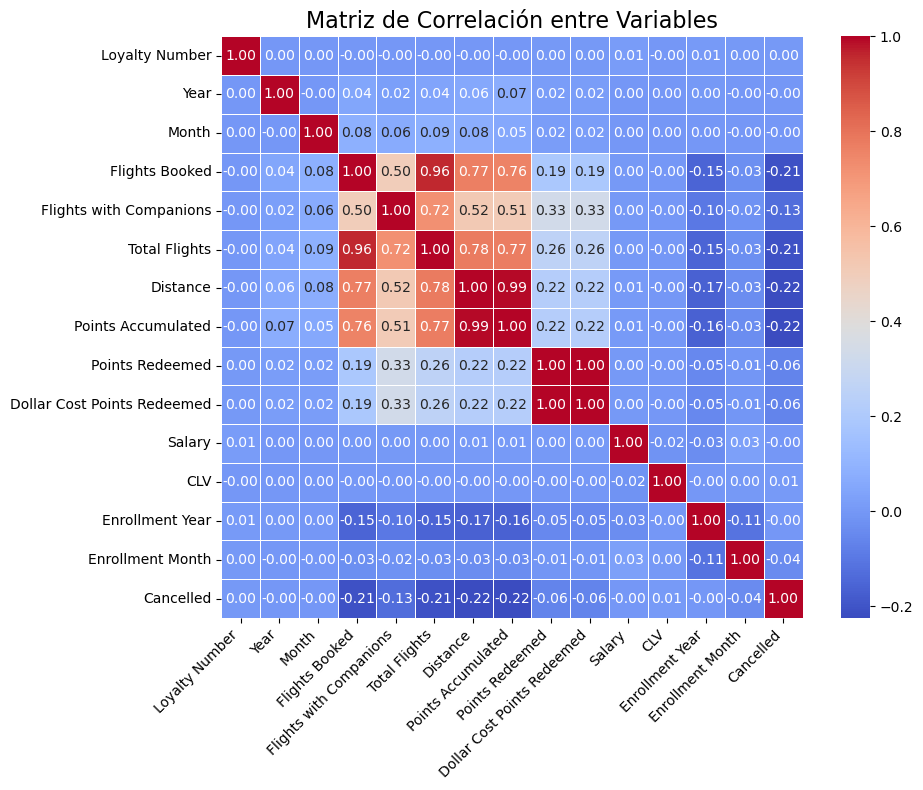

In [627]:
#Hacemos un heatmap para la ver coorrelacion entre variables.
# Ajustamos tamaño del gráfico
plt.figure(figsize=(10, 8))
# Heatmap limpio
sns.heatmap(
    correlation_matrix, 
    annot=True,        # Mostrar los valores
    cmap='coolwarm',   # Colores
    fmt='.2f',         # Formato de los números
    linewidths=0.5,    # Líneas entre celdas
    cbar=True,         # Barra de color
    square=True        # Celdas cuadradas
)

# Título
plt.title('Matriz de Correlación entre Variables', fontsize=16)

# Mejorar las etiquetas
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas x
plt.yticks(rotation=0)               # Etiquetas y horizontales

# Mostrar gráfico
plt.tight_layout()
plt.show()


 Vemos que hay algunas variables con una alta correlación entre sí:

**Flights Booked**, **Total Flights** y **Distance** tienen correlaciones muy altas (>0.75). Esto tiene sentido porque a más vuelos reservados, más vuelos totales y mayor distancia acumulada.
Points Accumulated también sigue esta tendencia, con correlaciones cercanas a 0.99 con Distance y 0.77-0.78 con Total Flights y Flights Booked. 
Esto indica que los puntos acumulados dependen directamente de la cantidad de vuelos y la distancia recorrida.



In [628]:
# Hacemos una lista con todas las columnas numéricas para poder hacer mas rapidamente el análisis de las variables numéricas. Para esto utilizo la función select_dtypes de pandas que me permite seleccionar las columnas de un dataframe según su tipo de dato. En este caso, selecciono las columnas que son de tipo numérico (int64 y float64) y guardo sus nombres en una lista llamada num_cols.
num_cols = df_limpio.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Columnas numéricas:", num_cols)

Columnas numéricas: ['Loyalty Number', 'Year', 'Month', 'Flights Booked', 'Flights with Companions', 'Total Flights', 'Distance', 'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed', 'Salary', 'CLV', 'Enrollment Year', 'Enrollment Month', 'Cancelled']


In [629]:
# Estadísticas descriptivas de las variables numéricas
def resumen_numerico(df_limpio, num_cols):
    """
    Genera un resumen estadístico completo para cada columna numérica en num_cols.
    Incluye media, mediana, moda, percentiles, desviación estándar, CV, rango y IQR.
    """
    for columna in num_cols:
        if columna not in df_limpio.columns:
            print(f"La columna '{columna}' no existe en el DataFrame.")
            continue
        
        serie = df_limpio[columna]
        
        media = serie.mean()
        mediana = serie.median()
        moda = serie.mode()[0] if not serie.mode().empty else np.nan
        p25 = serie.quantile(0.25)
        p75 = serie.quantile(0.75)
        std = serie.std()
        cv = std / media if media != 0 else np.nan
        rango = serie.max() - serie.min()
        iqr = p75 - p25
        
        print(f"""
Resumen estadístico para '{columna}':
---------------------------------------
Media: {media:.2f}
Mediana: {mediana:.2f}
Moda: {moda:.2f}
Percentil 25: {p25:.2f}
Percentil 75: {p75:.2f}
Desviación estándar: {std:.2f}
Coeficiente de variación (CV): {cv:.2f}
Rango: {rango:.2f}
Rango intercuartílico (IQR): {iqr:.2f}
""")

In [630]:
resumen_numerico(df_limpio, num_cols)


Resumen estadístico para 'Loyalty Number':
---------------------------------------
Media: 549875.38
Mediana: 550598.00
Moda: 617489.00
Percentil 25: 326699.00
Percentil 75: 772152.00
Desviación estándar: 258961.51
Coeficiente de variación (CV): 0.47
Rango: 899968.00
Rango intercuartílico (IQR): 445453.00


Resumen estadístico para 'Year':
---------------------------------------
Media: 2017.50
Mediana: 2018.00
Moda: 2018.00
Percentil 25: 2017.00
Percentil 75: 2018.00
Desviación estándar: 0.50
Coeficiente de variación (CV): 0.00
Rango: 1.00
Rango intercuartílico (IQR): 1.00


Resumen estadístico para 'Month':
---------------------------------------
Media: 6.50
Mediana: 7.00
Moda: 11.00
Percentil 25: 4.00
Percentil 75: 10.00
Desviación estándar: 3.45
Coeficiente de variación (CV): 0.53
Rango: 11.00
Rango intercuartílico (IQR): 6.00


Resumen estadístico para 'Flights Booked':
---------------------------------------
Media: 4.13
Mediana: 1.00
Moda: 0.00
Percentil 25: 0.00
Percentil 75: 8.0

In [631]:
df_limpio.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Enrollment Date,Cancelled
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,2016-08-01,0
1,100018,2017,2,2,2,4,1320,132.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,2016-08-01,0
2,100018,2018,10,6,4,10,3110,311.0,385,31,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,2016-08-01,0
3,100018,2017,4,4,0,4,924,92.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,2016-08-01,0
4,100018,2017,5,0,0,0,0,0.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,2016-08-01,0


In [632]:
#Identificación de valores atípicos en las variables numéricas. vamos a identificar los valores atípicos utilizando el método del rango intercuartílico (IQR). Este método considera como atípicos aquellos valores que están por debajo de Q1 - 1.5*IQR o por encima de Q3 + 1.5*IQR, donde Q1 es el percentil 25, Q3 es el percentil 75 y IQR es la diferencia entre Q3 y Q1. Para esto, vamos a crear una función que reciba el dataframe y la lista de columnas numéricas, y para cada columna calcule los límites inferior y superior para identificar los valores atípicos, y luego imprima el número de valores atípicos encontrados en cada columna.
def identificar_atipicos(df_limpio, num_cols):        
    for columna in num_cols:
        if columna not in df_limpio.columns:
            print(f"La columna '{columna}' no existe en el DataFrame.")
            continue
        
        serie = df_limpio[columna]
        
        q1 = serie.quantile(0.25)
        q3 = serie.quantile(0.75)
        iqr = q3 - q1
        limite_inferior = q1 - 1.5 * iqr
        limite_superior = q3 + 1.5 * iqr
        
        atipicos = serie[(serie < limite_inferior) | (serie > limite_superior)]
        num_atipicos = atipicos.count()
        porcentaje = num_atipicos / len(serie) * 100
        
        print(f"Columna '{columna}': {num_atipicos} valores atípicos encontrados. Corresponde a un ({porcentaje:.2f}% del total).")

In [633]:
identificar_atipicos(df_limpio, num_cols)

Columna 'Loyalty Number': 0 valores atípicos encontrados. Corresponde a un (0.00% del total).
Columna 'Year': 0 valores atípicos encontrados. Corresponde a un (0.00% del total).
Columna 'Month': 0 valores atípicos encontrados. Corresponde a un (0.00% del total).
Columna 'Flights Booked': 528 valores atípicos encontrados. Corresponde a un (0.13% del total).
Columna 'Flights with Companions': 71560 valores atípicos encontrados. Corresponde a un (17.72% del total).
Columna 'Total Flights': 1984 valores atípicos encontrados. Corresponde a un (0.49% del total).
Columna 'Distance': 125 valores atípicos encontrados. Corresponde a un (0.03% del total).
Columna 'Points Accumulated': 112 valores atípicos encontrados. Corresponde a un (0.03% del total).
Columna 'Points Redeemed': 24181 valores atípicos encontrados. Corresponde a un (5.99% del total).
Columna 'Dollar Cost Points Redeemed': 24181 valores atípicos encontrados. Corresponde a un (5.99% del total).
Columna 'Salary': 21140 valores atípi

---
Vamos a hacer un pequeño análisis sobre los datos que hemos obtenido: 

- Columnas como Loyalty Number, Year, Month, Enrollment Year/Month no tienen valores atípicos. Esto es normal: son identificadores o fechas con rangos naturales limitados.
- Otras columnas muestran muchos valores atípicos. Lo que significa que hay datos bastates extremos, es decir, que se alejan hacia la alta o la baja del promedio.
- Las columnas binarias (Cancellation Year_bin, Cancellation Month_bin) aparecen con muchos outliers porque, en realidad, solo tienen 0 y 1, y el método IQR los detecta como extremos. Por lo que no es un problema.


### Flights Booked (528 outliers) y Total Flights (1984 outliers):
La mayoría de los clientes tiene vuelos moderados, pero algunos vuelan mucho más que la media → clientes muy frecuentes.

### Flights with Companions (71560 outliers):
Parece que la mayoría de los vuelos no tienen acompañantes, y solo unos pocos tienen muchos vuelos con acompañantes → distribución altamente sesgada.

### Distance (125 outliers):
Algunos clientes vuelan distancias mucho más largas que el resto. Esto es útil para identificar clientes “frequent flyers” o viajeros internacionales.

### Points Accumulated (112 outliers): 
Clientes que acumulan una cantidad desproporcionada de puntos → probablemente viajeros frecuentes o con viajes largos.

### Points Redeemed y Dollar Cost Points Redeemed (24181 outliers cada una):
Algunos clientes canjean recompensas, mientras que la mayoría apenas usa puntos por eso hay tantos outliers.

### Salary (21140 outliers): 
Indicará que la mayoria no tiene un salario tan alto, los outliers, se deben a dispersión salarial,habrá algunos clientes con salarios muy altos en comparación con la mayoría.

### CLV -valor que aporta el cliente (35941 outliers): 
Algunos clientes generan mucho más valor que la media → clientes premium o frecuentes.


### Generales
- La mayoría de los outliers en vuelos, puntos, CLV y salario reflejan clientes extremos.
- Estos outliers son útiles para segmentar clientes: premium, power users, viajeros frecuentes o clientes con alto ingreso.
- Los outliers con porcentajes muy bajos (Distance, Points Accumulated) son clientes excepcionales, interesantes para campañas especiales.

----------------------------------------------------------------------------


2 Análisis de variables categóricas:
- Distribución de frecuencias de las variables categóricas relevantes.

"En todos los ejercicios, no te quedes solo en el “número”: añade siempre una breve interpretación en lenguaje natural, como lo haría un analista al presentar resultados a un equipo no técnico."


In [634]:
# Hacemos una lista con todas las columnas categóricas para poder hacer mas rapidamente el análisis de las variables categóricas. Para esto utilizo la función select_dtypes de pandas que me permite seleccionar las columnas de un dataframe según su tipo de dato. En este caso, selecciono las columnas que son de tipo categórico (object) y guardo sus nombres en una lista llamada cat_cols.
cat_cols = df_limpio.select_dtypes(include=['object']).columns.tolist()
print("Columnas categóricas:", cat_cols)

Columnas categóricas: ['Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education', 'Marital Status', 'Loyalty Card', 'Enrollment Type', 'Enrollment Date']


In [635]:
df_limpio.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Enrollment Date,Cancelled
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,2016-08-01,0
1,100018,2017,2,2,2,4,1320,132.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,2016-08-01,0
2,100018,2018,10,6,4,10,3110,311.0,385,31,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,2016-08-01,0
3,100018,2017,4,4,0,4,924,92.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,2016-08-01,0
4,100018,2017,5,0,0,0,0,0.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,2016-08-01,0


In [636]:
#vamos a analizar las variables categóricas relevantes para nuestro análisis. Para esto, vamos a crear un bucle que recorra cada una de las columnas categóricas relevantes y calcule la frecuencia absoluta y relativa de cada categoría dentro de esa columna. Luego, vamos a crear un DataFrame para cada columna con la categoría, la frecuencia absoluta y la frecuencia relativa en porcentaje, y lo guardaremos en un diccionario para poder mostrarlo posteriormente.
# Columnas categóricas relevantes
cat_cols = ["Gender","Education","Marital Status","Loyalty Card","Enrollment Type", "Province", "City"]

# Crear un diccionario para almacenar las tablas de frecuencias.
tablas_frecuencias = {}

for col in cat_cols:
    if col not in df_limpio.columns:
        print(f"La columna '{col}' no existe en el DataFrame.")
        continue

    # Frecuencia absoluta.
    frecuencia_absoluta = df_limpio[col].value_counts()
    
    # Frecuencia relativa en porcentaje,usamos normalize= true para indicar que queremso el calculo sobre el total.
    frecuencia_relativa = df_limpio[col].value_counts(normalize=True) * 100
    
    # Crear DataFrame de frecuencias
    tabla = pd.DataFrame({
        col: frecuencia_absoluta.index,
        'Frecuencia Absoluta': frecuencia_absoluta.values,
        'Frecuencia Relativa (%)': frecuencia_relativa.values.round(2)
    })
    
    # Guardar la tabla en el diccionario.
    tablas_frecuencias[col] = tabla

# Mostrar resultados.
for col, tabla in tablas_frecuencias.items():
    print(f"\n--- Tabla de frecuencias para '{col}' ---")
    print(tabla)


--- Tabla de frecuencias para 'Gender' ---
   Gender  Frecuencia Absoluta  Frecuencia Relativa (%)
0  Female               202757                    50.22
1    Male               201003                    49.78

--- Tabla de frecuencias para 'Education' ---
              Education  Frecuencia Absoluta  Frecuencia Relativa (%)
0              Bachelor               252567                    62.55
1               College               102260                    25.33
2  High School or Below                18915                     4.68
3                Doctor                17731                     4.39
4                Master                12287                     3.04

--- Tabla de frecuencias para 'Marital Status' ---
  Marital Status  Frecuencia Absoluta  Frecuencia Relativa (%)
0        Married               234845                    58.16
1         Single               108153                    26.79
2       Divorced                60762                    15.05

--- Tabla de fre

---
Ahora vamos a hacer un análisis de los resultados: 

### Gender
- La base de clientes está prácticamente equilibrada entre **mujeres y hombres**, lo que indica que no hay un sesgo de género importante en los registros. Esto es ideal si se piensa en campañas de marketing dirigidas a ambos sexos.

###  Education
- La mayoría de los clientes tienen **estudios universitarios (Bachelor o College)**, lo que sugiere un perfil educativo medio-alto. Los clientes con estudios avanzados (Master o Doctor) representan una pequeña fracción. Esto puede ser útil para segmentación de productos premium o estrategias de fidelización.

###  Marital Status
- La mayoría de los clientes están **casados**, seguido por solteros y divorciados. Esto puede influir en campañas de marketing o productos familiares, ya que los clientes casados podrían tener patrones de consumo diferentes a los solteros.

### Loyalty Card
- La tarjeta más común es **Star**, mientras que Aurora es la menos frecuente. Esto indica que la mayoría de los clientes están en programas estándar, y los segmentos Nova y Aurora podrían representar clientes más selectos o de mayor fidelidad.

### Enrollment Type
- La gran mayoría de los clientes se inscribieron bajo el tipo **Standard**, mientras que la promoción de 2018 representa una pequeña fracción. Esto sugiere que la base histórica es estable y que las promociones puntuales no impactan significativamente en el total de registros.


### Generales

- La base de clientes está bien equilibrada en términos de género, pero muestra claras concentraciones en educación (Bachelor), estado civil (Married) y tipo de tarjeta (Star).

- Esto indica que existen segmentos de clientes claramente dominantes que podrían ser priorizados para campañas de marketing, promociones o análisis de comportamiento.

- Las categorías minoritarias representan oportunidades para estrategias específicas de fidelización o captación de nuevos clientes.



---


## Fase 3: Visualización
Usando las herramientas de visualización que has aprendido durante este módulo, contesta a las siguientes preguntas usando la mejor gráfica que consideres.



- ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?


In [637]:
# Hago un .columns para ver todas las columnas del dataframe limpio.
df_limpio.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed',
       'Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education',
       'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type',
       'Enrollment Year', 'Enrollment Month', 'Enrollment Date', 'Cancelled'],
      dtype='object')

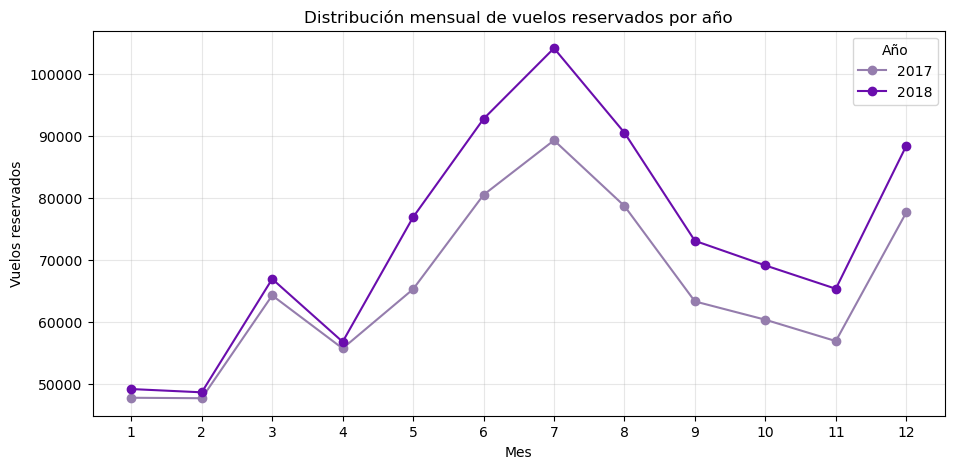

In [638]:
# Vamos a analizar la distribución de la cantidad de vuelos reservados por mes durante el año. 
# Para esto, vamos a crear un gráfico de líneas que muestre el número total de vuelos reservados en cada mes del año. 
# Primero, vamos a agrupar el dataframe por el mes de reserva y sumar la cantidad de vuelos reservados en cada mes. 
# Luego, vamos a crear un gráfico de lineplot utilizando la librería seaborn para visualizar esta distribución.



# Agregación: total de vuelos reservados por año y mes
# Se agrupan los datos por flight_year y flight_month para obtener el volumen total mensual de cada año.

flights_by_month_year = (df_limpio.groupby(["Year", "Month"], as_index=False)["Flights Booked"].sum().sort_values(["Year", "Month"]))
vuelos_por_mes = df_limpio.groupby("Month")["Flights Booked"].sum().reset_index()


# Lista de colores: dos morados distintos
colors = ["#957DAD", "#6A0DAD"]  # morado medio y morado oscuro

# Gráfico de líneas por año
plt.figure(figsize=(11,5))
for color, (year, data) in zip(colors, flights_by_month_year.groupby("Year")): #usamos zip para poder iterar por las dos listas y encapsularlas.
    plt.plot(data["Month"], data["Flights Booked"], marker="o", color=color, label=year)

plt.title("Distribución mensual de vuelos reservados por año")
plt.xlabel("Mes")
plt.ylabel("Vuelos reservados")
plt.xticks(range(1,13))  # meses 1-12
plt.grid(alpha=0.3)
plt.legend(title="Año")
plt.show()
    


Se puede identificar qué meses tienen más actividad de reservas. Vemos que hay picos si hay picos en verano o en navidades. Corresponderá a los periodos vacacionales. 
Esto ayuda a planificar promociones o recursos.

- ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?


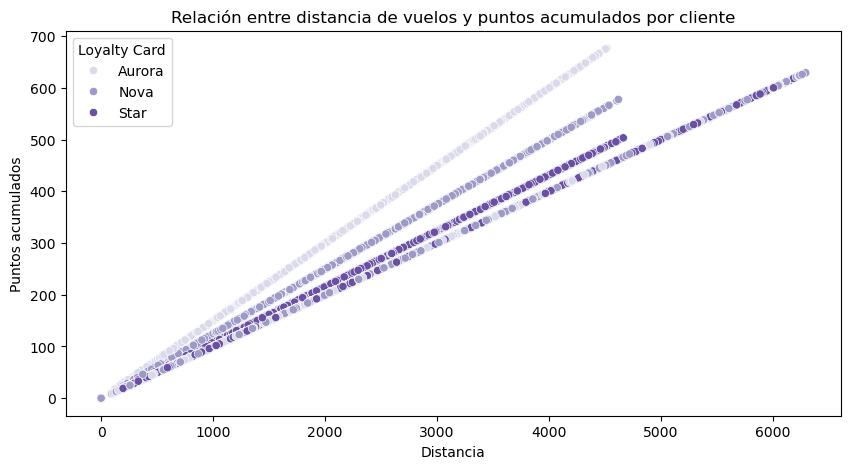

In [640]:
#Voy a analizar la relación entre la distancia de los vuelos y puntos acumulados por cliente. 
# Para esto, vamos a crear un gráfico de dispersión (scatterplot) utilizando la librería seaborn que muestre la relación entre la distancia de los vuelos y los puntos acumulados por cada cliente.
# Gráfico de dispersión
plt.figure(figsize=(10,5)) #tamañop del gráfico
sns.scatterplot(data=df_limpio, x="Distance", y="Points Accumulated", hue = "Loyalty Card", palette="Purples") #gráfico de dispersión con seaborn, indicando el dataframe, el eje x, el eje y, la variable de color (hue) parámetro que asigna colores a los puntos según los valores de una variable, normalmente categórica y la paleta de colores
plt.title("Relación entre distancia de vuelos y puntos acumulados por cliente") #título
plt.xlabel("Distancia") #etiqueta eje x
plt.ylabel("Puntos acumulados") #etiqueta eje y
plt.show() #para mostrar el gráfico


Se observa una tendencia lineal positiva clara: a medida que aumenta la distancia de los vuelos, los puntos acumulados también aumentan.
Esto tiene sentido, ya que los programas de fidelidad suelen asignar puntos proporcionalmente a la distancia recorrida.

Los puntos morados más claros reprsentan los clientes de la clase más alta, mientras que los puntos  oscuros representan la categoría Standard y los intermedios a la intermedia. 


In [641]:
df_limpio.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed',
       'Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education',
       'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type',
       'Enrollment Year', 'Enrollment Month', 'Enrollment Date', 'Cancelled'],
      dtype='object')

- ¿Cuál es la distribución de los clientes por provincia o estado?


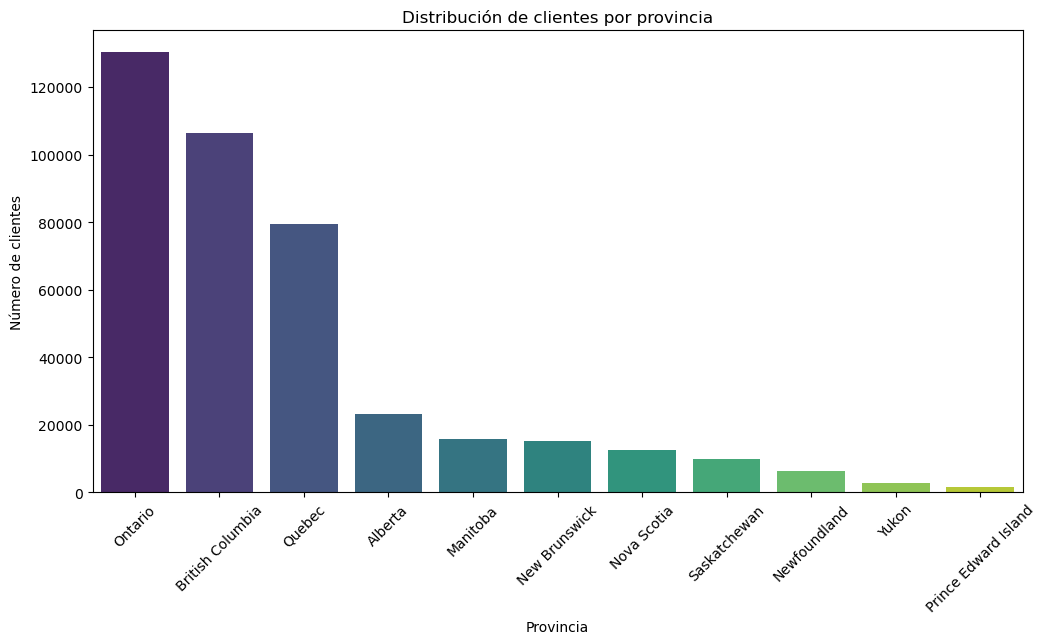

In [642]:
#Vamos a analizar la distrubución de los clientes por provincia o estado. 
# Para esto, vamos a crear un gráfico de barras que muestre el número de clientes en cada provincia o estado. 
# Primero, vamos a agrupar el dataframe por la columna "Province" y contar el número de clientes en cada provincia. 
# Luego, vamos a crear un gráfico de barras utilizando la librería seaborn para visualizar esta distribución.


# Conteo de clientes por provincia
provincia_counts = df_limpio["Province"].value_counts()

# Crear gráfico de barras
plt.figure(figsize=(12,6))
sns.barplot(x=provincia_counts.index, y=provincia_counts.values, palette="viridis")
plt.xticks(rotation=45)  # girar etiquetas para mejor lectura
plt.title("Distribución de clientes por provincia")  #título
plt.xlabel("Provincia") #etiqueta eje x
plt.ylabel("Número de clientes") #etiqueta eje y
plt.show() #mostrar gráfico

Algunas provincias tienen un número mucho mayor de clientes, Ontario,Quebec y BC, mientras que otras están menos representadas. Esto indica que la base de clientes está concentrada en ciertas regiones, probablemente debido a mayor población o actividad aérea.

- ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?


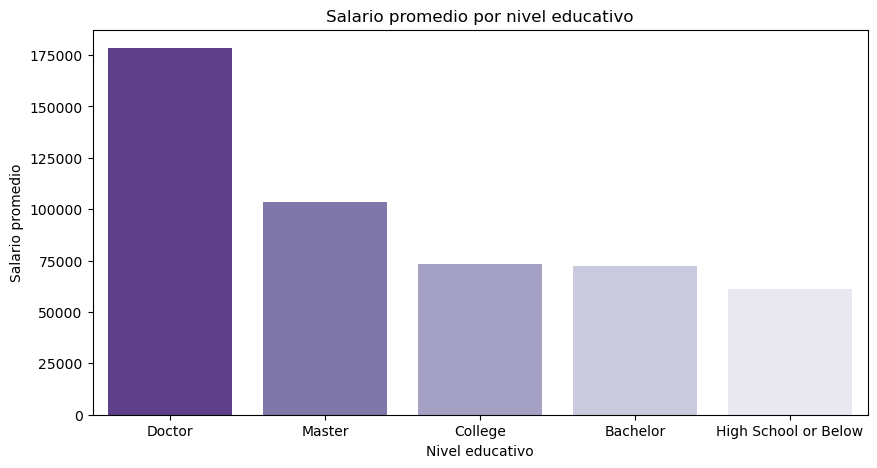

In [650]:
# Vamos a ver el salario promedio en lso diferentes niveles educativos. Para esto, vamos a agrupar el dataframe por la columna "Education" y calcular la media del salario para cada nivel educativo. 
# Luego, vamos a crear un gráfico de barras utilizando la librería seaborn para visualizar esta distribución.

# Agrupar por nivel educativo y calcular la media del salario
salario_por_educacion = df_limpio.groupby("Education")["Salary"].mean().reset_index()

# Ordenar de mayor a menor salario promedio
salario_por_educacion = salario_por_educacion.sort_values("Salary", ascending=False)

# Crear gráfico de barras
plt.figure(figsize=(10,5))
sns.barplot(data=salario_por_educacion, x="Education", y="Salary", palette="Purples_r")
plt.title("Salario promedio por nivel educativo") #título
plt.xlabel("Nivel educativo") #etiqueta eje x
plt.ylabel("Salario promedio") #etiqueta eje y
plt.show() #mostrar gráfico


Como vemos clarisimamente hay una relación entre los niveles de estudio y el salario. A mayor nivel educativo mayor salario y viceversa por lo que está compensado. Esto puede indicar que los outliers que vimos analizando las variables numéricas están bien ya que aunque sea más alto a más nivel educativo casi todos guardan una progresión estable, sin embargo en el salario promedio en Doctor se dispara.

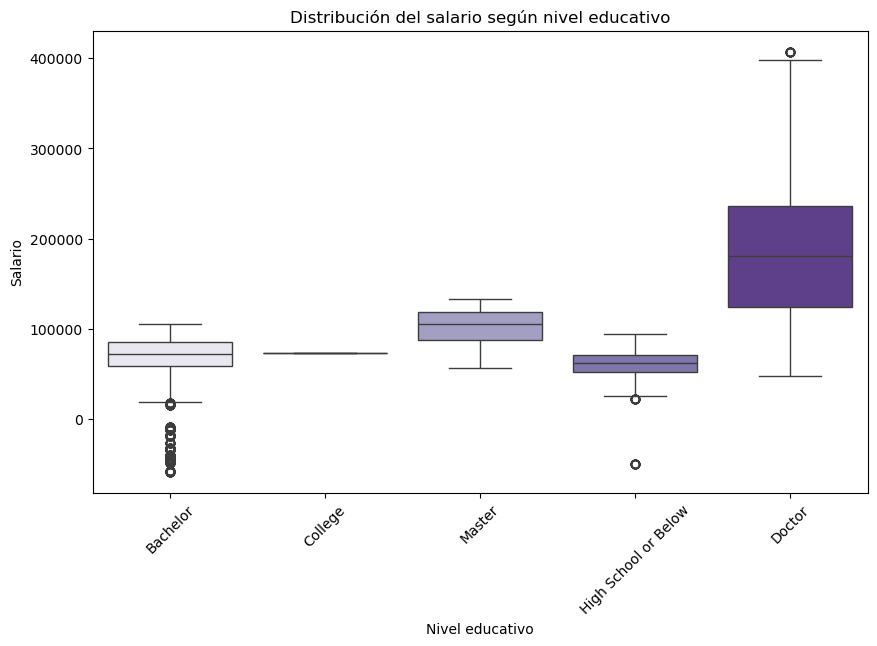

In [644]:
#Además complementamos con un boxplot para ver la distribución del salario por nivel educativo y poder identificar posibles valores atípicos. 
# Utilizando la librería seaborn que muestre la distribución del salario para cada nivel educativo.
plt.figure(figsize=(10,6))
sns.boxplot(data=df_limpio, x="Education", y="Salary", palette="Purples")

plt.title("Distribución del salario según nivel educativo")
plt.xlabel("Nivel educativo")
plt.ylabel("Salario")

plt.xticks(rotation=45)
plt.show()

Este gráfico muestra cómo varía el salario entre los distintos niveles educativos.
La línea central representa la mediana, mientras que la caja contiene el rango donde se concentra el 50% de los valores.
Se observan valores extremos en algunos grupos, lo que indica que existen clientes con salarios muy altos comparados con la mayoría y en otros que tiran mucho más a la baja.

- ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?


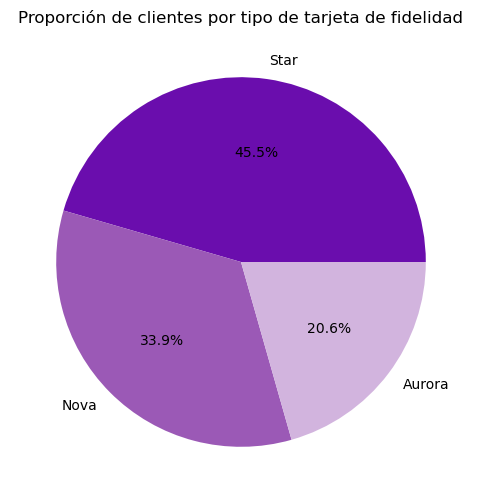

In [645]:
# Vamos a analizar la proporción de clientes con diferentes tarjetas de fidelidad. Para esto, vamos a crear un piec chart que muestre la proporción de clientes con cada tipo de tarjeta de fidelidad en %.

# Calcular proporciones en porcentaje.
tarjetas = df_limpio["Loyalty Card"].value_counts(normalize=True) * 100

# Colores morados
colores_morados = ["#6A0DAD", "#9B59B6", "#D2B4DE"]

# Gráfico circular.
plt.figure(figsize=(7,6))
plt.pie(
    tarjetas,
    labels=tarjetas.index,
    autopct="%1.1f%%",
    colors=colores_morados
)

plt.title("Proporción de clientes por tipo de tarjeta de fidelidad")
plt.show()

La tarjeta **Star** representa la mayor proporción de clientes, seguida por **Nova**, mientras que **Aurora** es la menos frecuente. Esto sugiere que la mayoría de los clientes se concentra en los niveles más comunes del programa, y una parte menor pertenece a categorías más exclusivas.

- ¿Cómo se distribuyen los clientes según su estado civil y género?


"En todos los ejercicios, no te quedes solo con la representación visual: añade siempre una breve interpretación en lenguaje natural, como lo haría un analista al presentar resultados a un equipo no técnico."


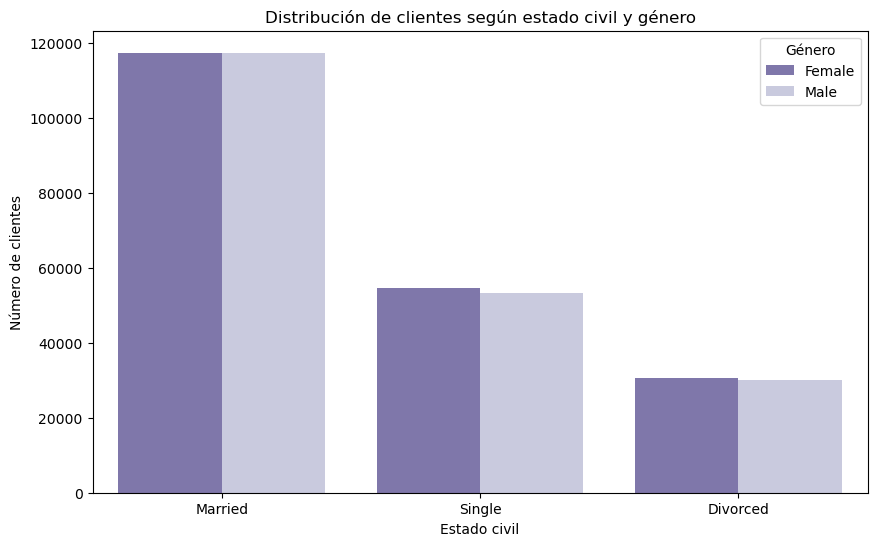

In [646]:
# vamos a ver la distribución de los clienets segun estado civil y genero.
# para ello hacemos un countplot con seaborn que nos permite mostrar la distribución de una variable categórica (en este caso, estado civil) y cómo se distribuye esa variable según otra variable categórica (en este caso, género).
#creamos el gráfico.
plt.figure(figsize=(10,6))

sns.countplot(
    data=df_limpio, #le pasamos el df limpio
    x="Marital Status", #clolumna que queremos analizar en el eje x
    hue="Gender", #variable que queremos usar para diferenciar los colores de las barras, en este caso el género
    palette= "Purples_r"
) #paleta de colores para el gráfico


plt.title("Distribución de clientes según estado civil y género") #título del gráfico
plt.xlabel("Estado civil") #etiqueta del eje x
plt.ylabel("Número de clientes") #etiqueta del eje y
plt.legend(title="Género") #leyenda para diferenciar los géneros

plt.show()

La base de clientes está dominada por personas **casadas**, y tanto hombres como mujeres presentan patrones **similares** en su estado civil, lo cual es útil para segmentación y estrategias de marketing dirigidas a distintos perfiles familiares.



## Fase 4: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo
Utilizando un conjunto de datos que hemos compartido, se busca evaluar si existen diferencias significativas en el número de vuelos reservados según el nivel educativo de los clientes. Para ello, los pasos que deberás seguir son:

- Preparación de Datos: Filtra el conjunto de datos para incluir únicamente las columnas relevantes: 'Flights Booked' y 'Education'.
- Análisis Descriptivo: Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas (como el promedio, la desviación estándar) del número de vuelos reservados para cada grupo.



In [647]:
# Filtrar columnas relevantes
df_educativo_vuelos = df_limpio[["Flights Booked", "Education"]]

# Ver primeras filas,para comprobar.
df_educativo_vuelos.head()

,Flights Booked,Education
0,3,Bachelor
1,2,Bachelor
2,6,Bachelor
3,4,Bachelor
4,0,Bachelor


In [648]:
# Agrupar por nivel educativo y calcular estadísticas descriptivas con describe.
estadistica_educativo = df_educativo_vuelos.groupby("Education")["Flights Booked"].describe().round(0)
# Ordenar de mayor a menor según el promedio de vuelos reservados
estadistica_educativo = estadistica_educativo.sort_values(
    by="mean",
    ascending=False)

display(estadistica_educativo)

,count,mean,std,min,25%,50%,75%,max
Education,,,,,,,,
Bachelor,252567.0,4.0,5.0,0.0,0.0,1.0,8.0,21.0
College,102260.0,4.0,5.0,0.0,0.0,1.0,8.0,21.0
Doctor,17731.0,4.0,5.0,0.0,0.0,1.0,8.0,21.0
High School or Below,18915.0,4.0,5.0,0.0,0.0,1.0,8.0,21.0
Master,12287.0,4.0,5.0,0.0,0.0,1.0,8.0,21.0


In [649]:
#calculo la mediana.
estadistica_educativo_2 = df_educativo_vuelos.groupby("Education")["Flights Booked"].median().round(0).reset_index()
display(estadistica_educativo_2)

,Education,Flights Booked
0,Bachelor,1.0
1,College,1.0
2,Doctor,1.0
3,High School or Below,1.0
4,Master,1.0


La tabla muestra las estadísticas descriptivas del número de vuelos reservados (Flights Booked) según el nivel educativo (Education).

No hay diferencias importantes entre niveles educativos.
Observamos que todos los niveles educativos tienen prácticamente el mismo comportamiento:

- Media (mean) ≈ 4 vuelos reservados

- Desviación estándar (std) ≈ 5

- Mínimo = 0

- Máximo = 21

- Mediana (50%) = 1 vuelo

- Percentil 75% = 8 vuelos


El nivel educativo no parece influir significativamente en la cantidad de vuelos reservados, ya que los promedios son idénticos en todos los grupos.